# Clasificación - XGBoost

In [1]:
# Importo librerías
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Cargo un dataset de imágenes de números 
digits = load_digits()
X, y = digits.data, digits.target

In [3]:
# Separo los datos en Train + Test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
np.unique(y_train, return_counts=True) 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([135, 145, 139, 137, 126, 123, 136, 138, 136, 132], dtype=int64))

In [9]:
model = xgb.XGBClassifier()

In [10]:
params = {
    "n_estimators" : [100],
    "max_depth"    : range(2, 8),
    "eta"          : [0.2, 0.9],
    "lambda"       : [0.2, 0.5, 2.0]
}

In [13]:
grid_xgb = GridSearchCV(model, params, cv = 3)
# grid_xgb = GridSearchCV(model, params, cv = 3, n_jobs=-1)

In [14]:
%%time
grid_xgb.fit(X_train, y_train)

CPU times: total: 6min 9s
Wall time: 51.4 s


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'eta': [0.2, 0.9], 'lambda': [0.2, 0.5, 2.0],
                         'max_depth': range(2, 8), 'n_estimators': [100]})

In [15]:
grid_xgb.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.2, eval_metric=None,
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None, lambda=2.0,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, ...)

In [16]:
grid_xgb.best_params_

{'eta': 0.2, 'lambda': 2.0, 'max_depth': 3, 'n_estimators': 100}

In [17]:
y_pred_train = grid_xgb.best_estimator_.predict(X_train)
y_pred_test  = grid_xgb.best_estimator_.predict(X_test)

In [18]:
print(u'- Accuracy en train: {}'.format(accuracy_score(y_train, y_pred_train)))
print(u'- Accuracy en test:  {}'.format(round(accuracy_score(y_test, y_pred_test),2)))

- Accuracy en train: 1.0
- Accuracy en test:  0.98


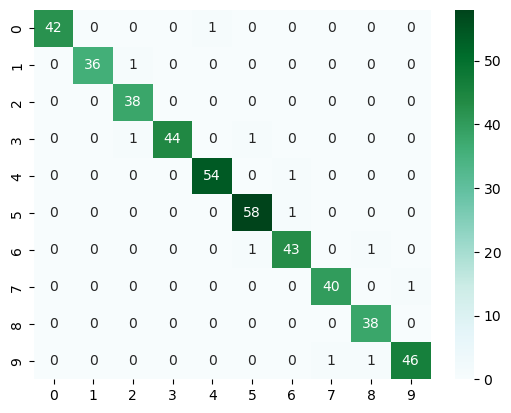

In [19]:
matrix = confusion_matrix(y_test, y_pred_test)

sns.heatmap(matrix, annot = True, cmap = "BuGn")
plt.show()